# Double Layer Anti-reflection coating.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import photovoltaic as pv

In [18]:
n0 = 1  # (units) refractive index of surroundings
nSemi = 3.5 # refractive index of semiconductor
Eg = 1.12 # (eV) bandgap of silicon
Wg = 1239.8 / Eg # wavelength at the bandgap

In [19]:
# read standard specta
wavelength, AM0, AM15G, AM15D = pv.sun.solar_spectra()
# truncate to wavelengths below bandgap
wavelength_Eg = wavelength[wavelength < Wg]
AM15G_Eg = AM15G[wavelength < Wg]

In [20]:
# current to band gap
photons = AM15G_Eg * (wavelength_Eg / 1239.8)
Jsc_total = np.trapz(photons, wavelength_Eg)
print(f'Ideal Jsc (zero reflectance) {Jsc_total:.2f} A/m²')

Ideal Jsc (zero reflectance) 437.73 A/m²


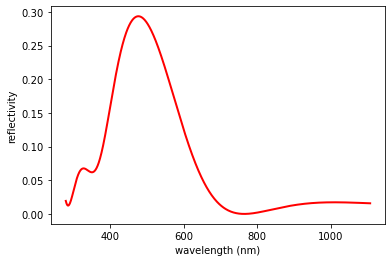

In [21]:
t1 = 200 # (nm) layer 1 thickness
n1 = 1.3 # (units) layer1 reefrractive index
t2 = 100 # (nm) layer 2 thickness
n2 = 2.2 # (units) layer2 reefrractive index

#calculate the reflectivity
reflectivity = pv.optic.dlarc_refl(wavelength_Eg, n0, n1, n2, nSemi, t1, t2)
Jsc_loss = np.trapz(photons * reflectivity, wavelength_Eg)  # A/m
R_weighted = Jsc_loss / Jsc_total

# plot the results
#plt.axis([250, 1200, 0, 0.40])
plt.plot(wavelength_Eg,reflectivity, lw=2, color='red')
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectivity')
plt.show()